# Dealing with missing values   

In [5]:
#Importing libraries

import pandas as pd  # for data manipulation -> DataFrame
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for statistical data visualization


In [74]:
# Load The data 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
# Accessing data
print(df.loc[0:2 , ["sex"]]) # Loc for accessing rows by index , and columns by name
print("\n\n")
print(df.iloc[0:2, 0:3] ) # Accessing specific rows and columns using iloc
print("\n\n")

# Displaying the first few rows of the DataFrame
print(df.head(3)) # Displaying the first 3 rows of the DataFrame
print("\n\n")

# Displaying the last few rows of the DataFrame
print(df.tail(3)) # Displaying the last 3 rows of the DataFrame
print("\n\n")

# Displaying the shape of the DataFrame
print(df.shape) # Shape of the DataFrame (rows, columns)
print("\n\n")

# Displaying the data types of each column
print(df.dtypes) # Data types of each column
print("\n\n")

# display datatypes of one column
print(df['age'].dtypes) # Data type of the 'age' column
print("\n\n")

#datatype for a value
print(type(df['age'][0])) # Data type of the first value in the 'age' column
print("\n\n")


# Displaying the summary statistics of the DataFrame
print(df.describe()) # Summary statistics for numerical columns
print("\n\n")

# Filtering the DataFrame
df[df['age'] > 22].head() 




      sex
0    male
1  female
2  female



   survived  pclass     sex
0         0       3    male
1         1       1  female



   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  



     survived  pclass     sex   age  sibsp  parch   fare embarked  class  \
888         0       3  female   NaN      1      2  23.45        S  Third   
889         1       1    male  26.0      0      0  30.00        C  First   
890         0       3    male  32.0      0      0   7.75        Q  Third   

       who  adult_male deck  embark_town 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


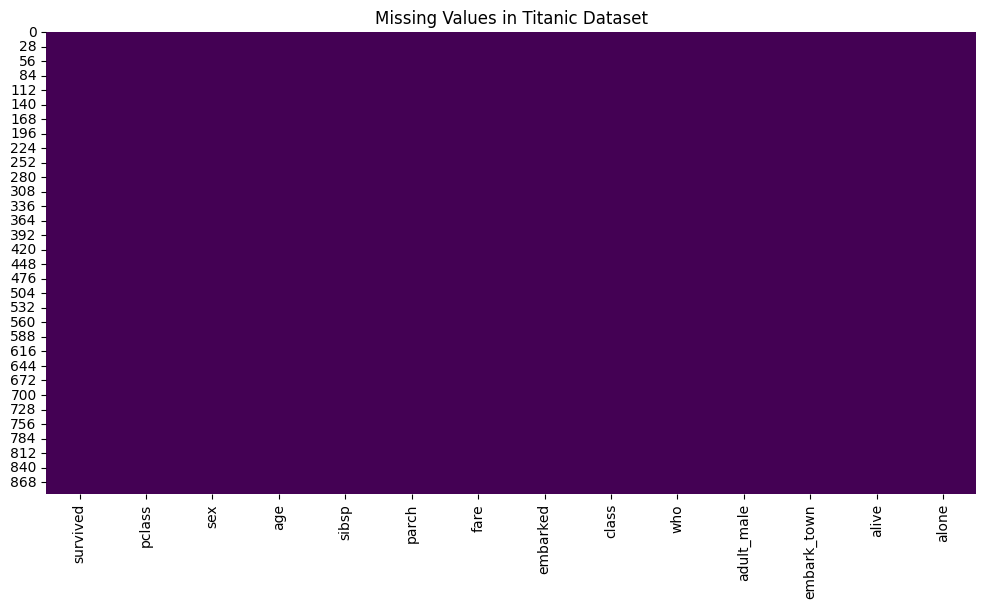



Missing Values count Analysis:

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64



Percentage of missing values in each column:

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


Unique values in each column:
survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64





In [82]:
#Plot to see missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# Show the plot
plt.title('Missing Values in Titanic Dataset')
plt.show()


print("\n\nMissing Values count Analysis:\n")
# Displaying the count of missing values in each column
print(df.isnull().sum().sort_values(ascending=False))  # Count of missing values in each column
print("\n\n")
print("Percentage of missing values in each column:\n")
print(round((df.isnull().sum() / len(df) *100).sort_values(ascending=False),2))  # Percentage of missing values in each column

# # BY data info
# print("\n\n")
# df.info()  # Displaying information about the DataFrame, including non-null counts and data types


# Displaying the count of unique values
print("\n\nUnique values in each column:")
print(df.nunique())  # Count of unique values in the 'age' column
print("\n\n")



In [81]:

# Filling missing values
# Filling missing values in the 'age' column with the mean age
df['age'].fillna(df['age'].mean(), inplace=True)

# remove deck column
#remove if otherwise not needed
df.drop(columns=['deck'], inplace=True ,errors='ignore')  # Remove the 'deck' column if it exists


df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)  # Fill missing values in 'embarked' with the mode


df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)  # Fill missing values in 'embark_town' with the mode
df.head()

C:\Users\umar1\AppData\Local\Temp\ipykernel_5616\4062936101.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\umar1\AppData\Local\Temp\ipykernel_5616\4062936101.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
